In [1]:
import numpy as np
import matplotlib.pyplot as plt

at t = 3.5 * 10^6, the value of x =  2.1347193142899337


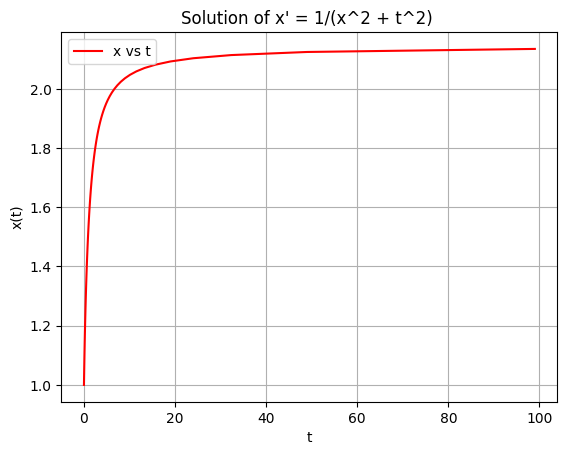

In [2]:
# give dx/dt:
def f1(t, x):
    return 1/(x**2 + t**2)

''' t ranges from o to inf, to resolve this lets do a variable change z = 1/(1 + 1/t)
    at t = 0, z=0, and at t=inf, z=1

    x(t=0) = 1, so x(z=0) = 1
 '''

# define dx/dz:
def f2(z, x):
    return  1 / ( ((1-z)**2) * (x**2) + (z**2) )

def runge_kutta(f, z0, x0, zf, h):
    z_values = [z0]
    x_values = [x0]

    z = z0
    x = x0
    while z < zf:
        k1 = h * f(z, x)
        k2 = h * f(z + 0.5 * h, x + 0.5 * k1)
        k3 = h * f(z + 0.5 * h, x + 0.5 * k2)
        k4 = h * f(z + h, x + k3)

        x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        z += h

        if z < zf:
            z_values.append(z)
            x_values.append(x)

    return np.array(z_values), np.array(x_values)


z0 = 0 # as at t=0, z=1
zf = 1 # as at t=inf, z=0

x0 = 1 # initial value
h = 0.01 # step size

z_values, x_values = runge_kutta(f2, z0, x0, zf, h)

# determine the value at t = 3.5 * 10^6

def fz(t):  #z as a function of t
    return 1/(1 + 1/t)

t_target = 3.5 * 1e6
z_target = fz(t_target)
x_target = np.interp(z_target, z_values, x_values)

print("at t = 3.5 * 10^6, the value of x = ", x_target)

# Plot x as a function of t

def z_to_t(z):        # function to get t(z)
    return z/(1 - z)

t_values = z_to_t(z_values)

plt.plot(t_values, x_values, color = 'r', label = "x vs t")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.grid(True)
plt.title("Solution of x' = 1/(x^2 + t^2) ")
plt.show()
